In [3]:
import pandas as pd

# Lendo o arquivo CSV principal
df = pd.read_csv("PS.csv", sep = ",")

# Visualizando as primeiras linhas
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


##  Nomeção das variaveis

In [4]:
df.rename(columns={
    'step': 'hora',
    'type': 'tipo_transacao',
    'amount': 'valor',
    'nameOrig': 'cliente_origem',
    'oldbalanceOrg': 'saldo_origem_antigo',
    'newbalanceOrig': 'saldo_origem_novo',
    'nameDest': 'cliente_destino',
    'oldbalanceDest': 'saldo_destino_antigo',
    'newbalanceDest': 'saldo_destino_novo',
    'isFraud': 'eh_fraude',
    'isFlaggedFraud': 'sinalizado_como_fraude'
}, inplace=True)

df.head()

,hora,tipo_transacao,valor,cliente_origem,saldo_origem_antigo,saldo_origem_novo,cliente_destino,saldo_destino_antigo,saldo_destino_novo,eh_fraude,sinalizado_como_fraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
print(df['eh_fraude'].value_counts(dropna=False))


eh_fraude
0.0    97110
1.0      114
NaN        1
Name: count, dtype: int64


In [6]:
# Garantir que a coluna data_hora esteja em datetime
df['hora'] = pd.to_datetime(df['hora'])

# Criar a coluna hora
df['hora'] = df['hora'].dt.hour


In [7]:
df.isnull().sum()


,0
hora,0
tipo_transacao,0
valor,0
cliente_origem,0
saldo_origem_antigo,0
saldo_origem_novo,0
cliente_destino,0
saldo_destino_antigo,0
saldo_destino_novo,1
eh_fraude,1


In [8]:
# 1. Criar cópia do DataFrame original
df = df.copy()

# 2. Renomear a coluna, se necessário
df.rename(columns={
    'isFraud': 'eh_fraude',
}, inplace=True)

# 3. Tratar valores nulos
df['eh_fraude'] = df['eh_fraude'].fillna(0)
df['saldo_destino_novo'] = df['saldo_destino_novo'].fillna(0)

# 4. Converter para tipos apropriados
df['eh_fraude'] = df['eh_fraude'].astype(int)
# saldo_destino_novo pode permanecer float, mas se você quiser int:
# df['saldo_destino_novo'] = df['saldo_destino_novo'].astype(int)  # cuidado com valores com decimais

# 5. Verificar se tudo foi convertido corretamente
print("Valores únicos em 'eh_fraude':")
print(df['eh_fraude'].value_counts())


Valores únicos em 'eh_fraude':
eh_fraude
0    97111
1      114
Name: count, dtype: int64


In [9]:
print(df)

       hora tipo_transacao     valor cliente_origem  saldo_origem_antigo  \
0         0        PAYMENT   9839.64    C1231006815             170136.0   
1         0        PAYMENT   1864.28    C1666544295              21249.0   
2         0       TRANSFER    181.00    C1305486145                181.0   
3         0       CASH_OUT    181.00     C840083671                181.0   
4         0        PAYMENT  11668.14    C2048537720              41554.0   
...     ...            ...       ...            ...                  ...   
97220     0        PAYMENT  17011.46    C1283088834                  0.0   
97221     0        PAYMENT   1680.50        C671281                  0.0   
97222     0        PAYMENT  26450.83     C948744009                  0.0   
97223     0        PAYMENT  12171.47    C1843902873                  0.0   
97224     0        PAYMENT   6733.59     C708911726                  0.0   

       saldo_origem_novo cliente_destino  saldo_destino_antigo  \
0              160296

In [10]:
df.isnull().sum()

,0
hora,0
tipo_transacao,0
valor,0
cliente_origem,0
saldo_origem_antigo,0
saldo_origem_novo,0
cliente_destino,0
saldo_destino_antigo,0
saldo_destino_novo,0
eh_fraude,0


 ## Variável: cliente_destino
 - Prefixo 'C' (Customer): Indica transações entre indivíduos (P2P - Pessoa para Pessoa).
 Exemplo: Transferências entre contas de usuários comuns.

 - Prefixo 'M' (Merchant): Indica transações comerciais (P2B - Pessoa para Empresa).
  Exemplo: Pagamentos a lojas online ou serviços.

 ## Observação: Dados sintéticos do PaySim não representam CPF/CNPJ reais, mas seguem a mesma lógica de identificação.

In [11]:
# Criação de uma nova coluna para entender as transições e facilitar na transfomação numerica.
df['tipo_destino'] = df['cliente_destino'].apply(
    lambda x: 'C' if str(x).startswith('C') else 'M')

df.head()

,hora,tipo_transacao,valor,cliente_origem,saldo_origem_antigo,saldo_origem_novo,cliente_destino,saldo_destino_antigo,saldo_destino_novo,eh_fraude,sinalizado_como_fraude,tipo_destino
0,0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0.0,M
1,0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0.0,M
2,0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0.0,C
3,0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0.0,C
4,0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0.0,M


In [12]:
#Retirando as colunas ID
df = df.drop(columns=['cliente_origem', 'cliente_destino', 'sinalizado_como_fraude',])



# Insight
Devido ao conhecimento da base de dados, se incluirmos os casos que não são fraudes, corremos o risco de não perceber os comportamentos característicos das fraudes existentes.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df['eh_fraude'].value_counts(normalize=True))  # ~0,07% fraudes


eh_fraude
0    0.998827
1    0.001173
Name: proportion, dtype: float64


In [14]:
# Filtrar apenas as transações que foram fraude
fraudes = df[df['eh_fraude'] == 1]
print(fraudes['tipo_transacao'].value_counts())


tipo_transacao
CASH_OUT    58
TRANSFER    56
Name: count, dtype: int64


In [15]:
print(fraudes['valor'].describe())

count    1.140000e+02
mean     5.422481e+05
std      1.548583e+06
min      1.640000e+02
25%      1.724600e+04
50%      3.506363e+04
75%      2.624345e+05
max      1.000000e+07
Name: valor, dtype: float64


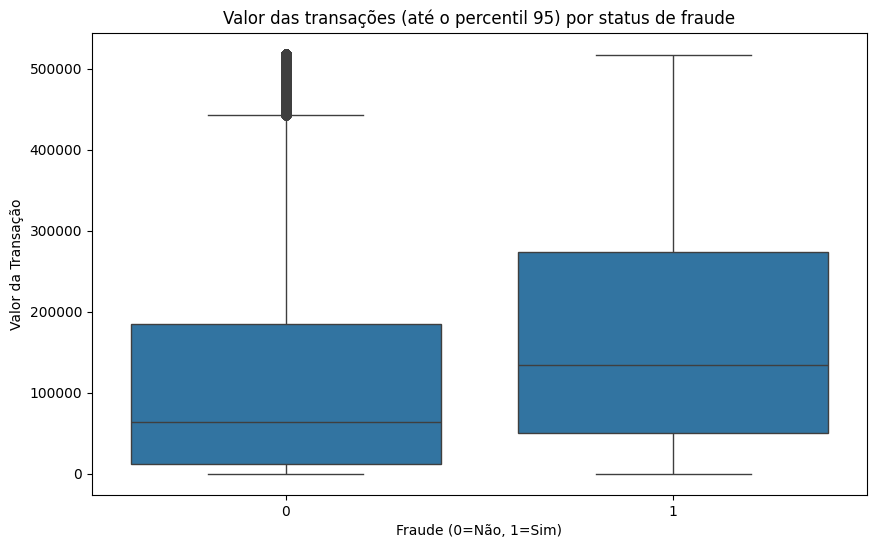

In [42]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['valor'] < df['valor'].quantile(0.95)], x='eh_fraude', y='valor')
plt.title('Valor das transações (até o percentil 95) por status de fraude')
plt.xlabel('Fraude (0=Não, 1=Sim)')
plt.ylabel('Valor da Transação')
plt.show()


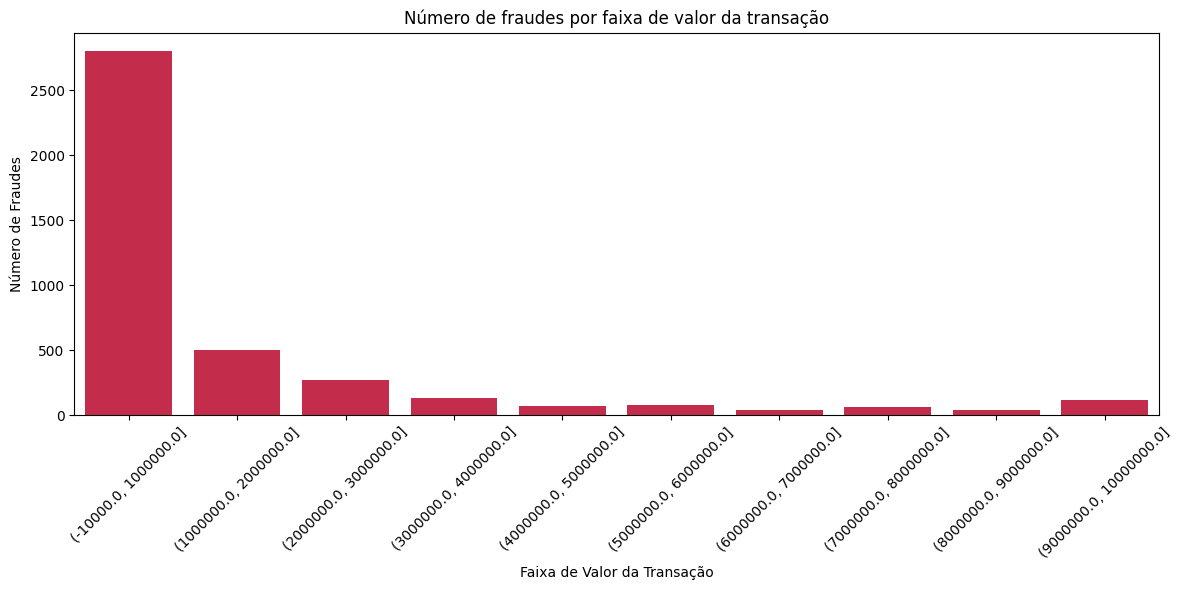

In [48]:
# Filtrar apenas as transações fraudulentas
fraudes = df[df['eh_fraude'] == 1].copy()

# Criar faixas de valor (bins)
fraudes['faixa_valor'] = pd.cut(fraudes['valor'], bins=10)

# Contar o número de fraudes por faixa de valor
contagem = fraudes['faixa_valor'].value_counts().sort_index()

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=contagem.index.astype(str), y=contagem.values, color='crimson')
plt.title('Número de fraudes por faixa de valor da transação')
plt.xlabel('Faixa de Valor da Transação')
plt.ylabel('Número de Fraudes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Número total de fraudes: 4121


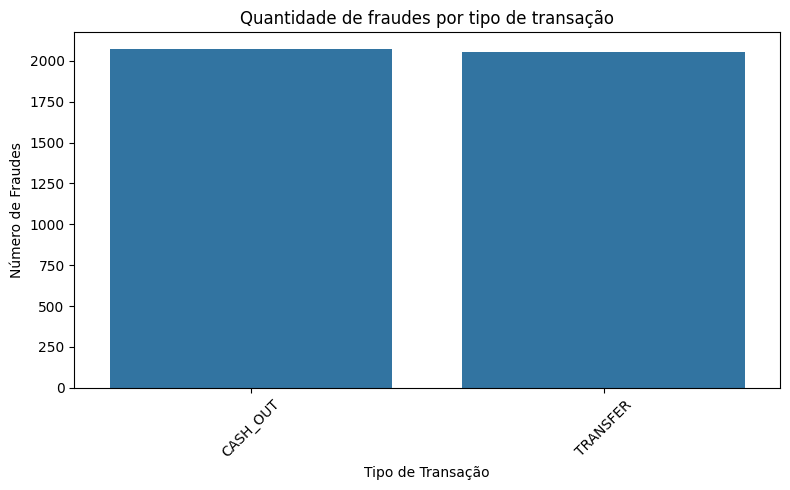

In [21]:
# Filtrar apenas os registros de fraude
fraudes = df[df['eh_fraude'] == 1]

# Verificar quantas fraudes há no total
print("Número total de fraudes:", len(fraudes))

# Plotar o gráfico
plt.figure(figsize=(8, 5))
sns.countplot(data=fraudes, x='tipo_transacao', order=fraudes['tipo_transacao'].value_counts().index)
plt.title('Quantidade de fraudes por tipo de transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Número de Fraudes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

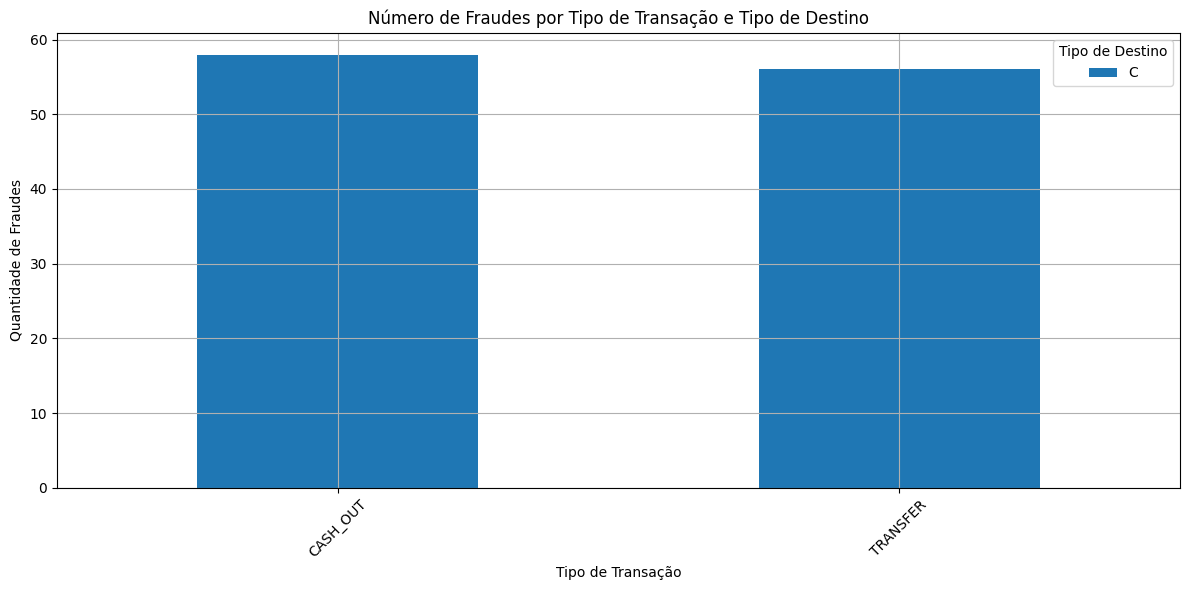

In [16]:
# Filtrar apenas as transações que são fraude
fraudes = df[df['eh_fraude'] == 1]

# Agrupar pelos tipos de transação e destino, contando quantas fraudes existem em cada combinação
fraudes_agrupadas = fraudes.groupby(['tipo_transacao', 'tipo_destino']).size().unstack(fill_value=0)

# Plotar gráfico de barras
fraudes_agrupadas.plot(kind='bar', figsize=(12, 6))

plt.title('Número de Fraudes por Tipo de Transação e Tipo de Destino')
plt.xlabel('Tipo de Transação')
plt.ylabel('Quantidade de Fraudes')
plt.legend(title='Tipo de Destino')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

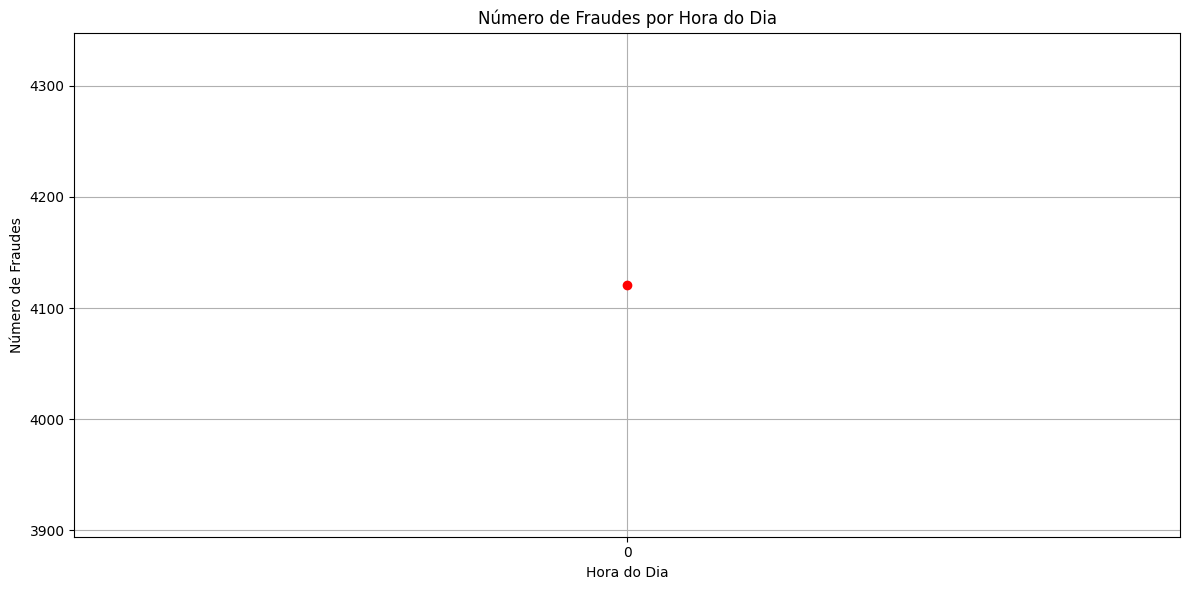

In [44]:
# Agrupar as fraudes por hora
fraudes_por_hora = fraudes['hora'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(fraudes_por_hora.index, fraudes_por_hora.values, marker='o', linestyle='-', color='red')
plt.title('Número de Fraudes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Fraudes')
plt.xticks(fraudes_por_hora.index)
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Salvar o DataFrame no mesmo diretório do script
df.to_csv('PS_trans.csv', index=False, encoding='utf-8-sig')





In [49]:
# Lendo o arquivo CSV principal
trans = pd.read_csv("PS_trans.csv", sep = ",")

# Visualizando as primeiras linhas
trans.head()

,hora,tipo_transacao,valor,saldo_origem_antigo,saldo_origem_novo,saldo_destino_antigo,saldo_destino_novo,eh_fraude,tipo_destino
0,0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,M
1,0,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,M
2,0,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,C
3,0,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,C
4,0,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,M
